# DIGIT CLASSIFICATION USING MACHINE LEARNING-ManipuriDataset

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

In [6]:
def croppedImage(img):
    # Import required packages

    # Convert the image to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

    # Applying dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

    # Finding contours
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    im2 = img.copy()

    countours_largest = sorted(contours, key=lambda x: cv2.contourArea(x))[-1]
    bb=cv2.boundingRect(countours_largest)

    # pt1 and pt2 are terminal coordinates of the diagonal of the rectangle
    pt1=(bb[0],bb[1]) # upper coordinates 
    pt2=(bb[0]+bb[2],bb[1]+bb[3]) # lower coordinates
    cropped = im2[bb[1]:bb[1]+bb[3], bb[0]:bb[0]+bb[2]]
    
    return cropped

In [7]:
image = []
binary_image = []
label = []
path = r"C:\Users\ADMIN\Documents\Msc\Sem3\dataset\manipuri"
for dataPath in os.listdir(path):
    imgpath = os.path.join(path,dataPath)
    for img in os.listdir(imgpath):
        images = cv2.imread(os.path.join(imgpath,img))
        images = croppedImage(images)
      
        images = cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)
        images = cv2.resize(images, (64,64), interpolation = cv2.INTER_AREA)
        image.append(images)
        label.append(int(dataPath))

In [8]:
image = np.array(image, dtype = "float")/255.0

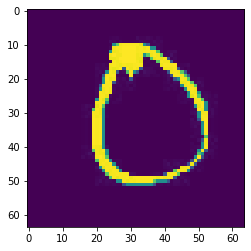

In [9]:
plt.imshow(image[0])

In [11]:
from keras.models import Sequential 
from keras.layers import MaxPooling2D , AveragePooling2D,AveragePooling1D
def avgPool(data):
    
    max_pool = AveragePooling2D(pool_size = 3, strides = 1)

    #define a sequential model with just one pooling layer
    model = Sequential([max_pool]) 

    #get the output 
    output = model.predict(data) 

    #print the output  
    output = np.squeeze(output) 
    
    return output


In [12]:
avgData = []
for img in image:
    img = img.reshape(1,img.shape[0],-1,1)
    output = avgPool(img)
    avgData.append(output)

1/1 [==============================] - 0s 42ms/step


In [13]:
avgData = np.array(avgData, dtype = "float")

In [14]:
# sobel_data = []
# for img in avgData:
#     sobel_data.append(sobel(img))
# train_image = np.array(sobel_data, dtype = "float")

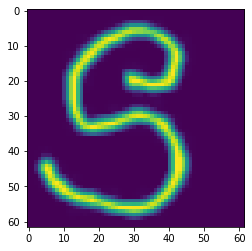

In [16]:
plt.imshow(avgData[120])

In [17]:
from sklearn.model_selection import train_test_split
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, x_test, y_train, y_test = train_test_split(avgData,label,test_size = 0.2, random_state = 11)


In [18]:
train_x = np.reshape(x_train, (x_train.shape[0], -1))
test_x = np.reshape(x_test, (x_test.shape[0], -1))

In [19]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
dtree = DecisionTreeClassifier()
RF_model = RandomForestClassifier()

#Fit the model on training data
RF_model.fit(train_x, y_train)

# from sklearn.svm import SVC
# svc = SVC(probability = True)
# svc.fit(train_x,y_train)

RandomForestClassifier()

In [20]:
#Predict on test
test_prediction = RF_model.predict(test_x)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, test_prediction))
print(classification_report(y_test, test_prediction))


Accuracy =  0.7135416666666666
[[18  0  0  0  0  0  1  1  0  0]
 [ 1 14  1  0  1  0  0  0  1  0]
 [ 0  0 11  3  0  0  0  0  0  0]
 [ 0  0  8 17  0  0  0  0  0  0]
 [ 0  0  0  1 19  1  0  2  1  0]
 [ 1  0  0  2  0 14  2  0  0  1]
 [ 1  0  2  0  2  2 12  0  0  3]
 [ 0  1  0  0  0  0  0 14  0  0]
 [ 0  0  1  0  0  3  1  1 13  2]
 [ 0  0  1  0  0  1  3  0  3  5]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.93      0.78      0.85        18
           2       0.46      0.79      0.58        14
           3       0.74      0.68      0.71        25
           4       0.86      0.79      0.83        24
           5       0.67      0.70      0.68        20
           6       0.63      0.55      0.59        22
           7       0.78      0.93      0.85        15
           8       0.72      0.62      0.67        21
           9       0.45      0.38      0.42        13

    accuracy                           0.7

In [21]:
def identifyImage(img):

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64),interpolation = cv2.INTER_CUBIC)

    ret, thresh1 = cv2.threshold(img.copy(), 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # Applying dilation on the threshold image
    input_img_features = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    #input_img_features = cv2.erode(input_img_features,rect_kernel, iterations = 1 )


    
#     plt.imshow(input_img_features)
#     plt.show()
    input_img_features = sobel(input_img_features)
    
    input_img_for_RF = input_img_features.reshape(1,input_img_features.shape[0],-1,1)
    input_img_for_RF = np.float32(input_img_for_RF)
    input_img_for_RF = avgPool(input_img_for_RF)
    
    input_img_for_RF = input_img_for_RF.reshape(1,-1)

    img_prediction = RF_model.predict(input_img_for_RF)
    print(RF_model.predict_proba(input_img_for_RF))

    print("The prediction for this image is: ", img_prediction)


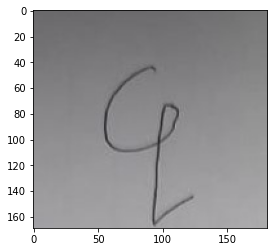

1/1 [==============================] - 0s 38ms/step
[[0.02 0.07 0.17 0.15 0.04 0.06 0.14 0.01 0.2  0.14]]
The prediction for this image is:  [8]


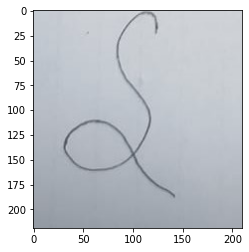

1/1 [==============================] - 0s 42ms/step
[[0.01 0.07 0.22 0.12 0.18 0.07 0.13 0.1  0.07 0.03]]
The prediction for this image is:  [2]


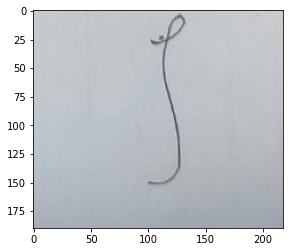

1/1 [==============================] - 0s 47ms/step
[[0.15 0.22 0.1  0.05 0.21 0.1  0.08 0.03 0.03 0.03]]
The prediction for this image is:  [1]


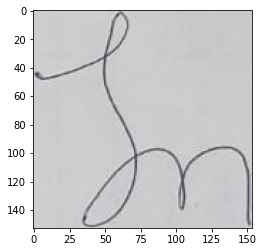

1/1 [==============================] - 0s 50ms/step
[[0.02 0.14 0.29 0.31 0.06 0.   0.03 0.02 0.07 0.06]]
The prediction for this image is:  [3]


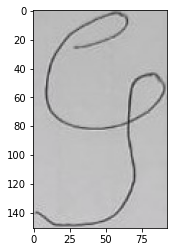

1/1 [==============================] - 0s 38ms/step
[[0.06 0.04 0.03 0.06 0.08 0.1  0.07 0.06 0.3  0.2 ]]
The prediction for this image is:  [8]


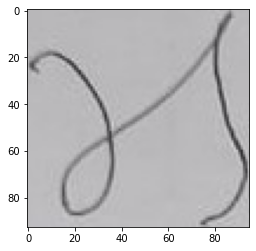

1/1 [==============================] - 0s 54ms/step
[[0.04 0.06 0.07 0.09 0.14 0.01 0.03 0.43 0.02 0.11]]
The prediction for this image is:  [7]


In [23]:
testImg = []
for dir in os.listdir("C:/Users/ADMIN/Documents/Msc/Sem3/moredata/testImage/Manipuri/"):
    path = os.path.join("C:/Users/ADMIN/Documents/Msc/Sem3/moredata/testImage/Manipuri/",dir)   
        
    img = cv2.imread(path)
    crImage = croppedImage(img)
    testImg.append(img)
    plt.imshow(crImage)
    plt.show()
    identifyImage(crImage)
    